In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df = df.iloc[-1000:]

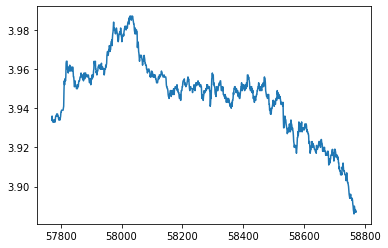

In [4]:
plt.plot(df['open'])
plt.show()

In [5]:
span_pred = 10

### 涨跌预测模型测试

In [6]:
from pred_trend import moving_average, rsi

In [7]:
trend_pred_ma = df['open'].rolling(span_pred).apply(moving_average)

In [8]:
trend_pred_rsi = df['open'].rolling(span_pred).apply(rsi)

In [9]:
trend = df['open'].shift(-5) - df['open']

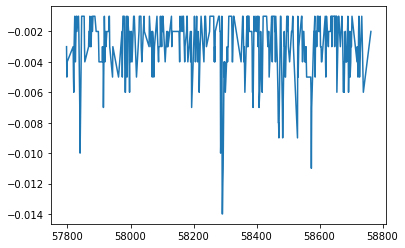

In [10]:
accuracy_ma = trend_pred_ma * trend
plt.plot(accuracy_ma[accuracy_ma < 0][span_pred:])
plt.show()

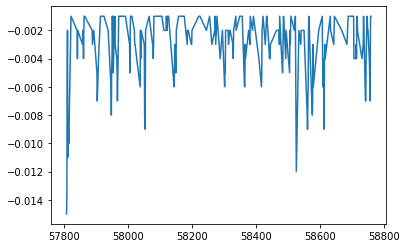

In [11]:
accuracy_rsi = trend_pred_rsi * trend
plt.plot(accuracy_rsi[accuracy_rsi < 0][span_pred:])
plt.show()

In [12]:
sum_ma = accuracy_ma[accuracy_ma < 0].sum()
sum_ma

-1.1890000000000036

In [13]:
sum_rsi = accuracy_rsi[accuracy_rsi < 0].sum()
sum_rsi

-0.7630000000000012

In [14]:
count_ma = accuracy_ma[accuracy_ma < 0].count()
count_ma

409

In [15]:
count_rsi = accuracy_rsi[accuracy_rsi < 0].count()
count_rsi

230

rsi比较保守，很多时候不做判断。以上按涨跌预测相反的指标来看，rsi的预测结果更好一点，但这可能是因为它比较保守的原因。